# Student Result EDA & FE

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("student_scores.csv")

In [3]:
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,05-Oct,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,05-Oct,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,05-Oct,76,78,75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [5]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [6]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [7]:
df["WklyStudyHours"] = df["WklyStudyHours"].str.replace("05-Oct","5-10")

In [8]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5-10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5-10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5-10,76,78,75


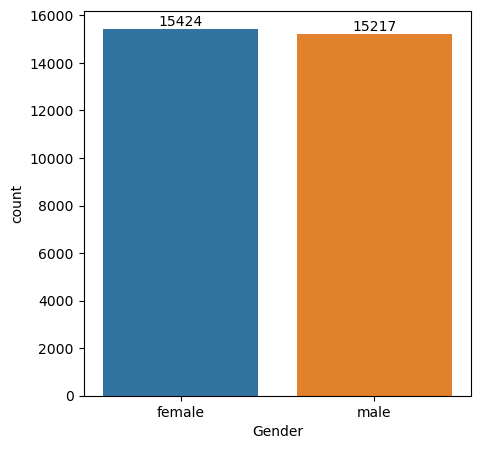

In [9]:
plt.figure(figsize=(5,5))
plot = sns.countplot(data=df, x="Gender")
plot.bar_label(plot.containers[0])
plt.show()

# Observation
The number of Females is more than the nymber of Males in the data.

In [10]:
gb = df.groupby("ParentEduc").agg({"MathScore":"mean","WritingScore":"mean","ReadingScore":"mean"})
gb

,MathScore,WritingScore,ReadingScore
ParentEduc,,,
associate's degree,68.365586,70.299099,71.124324
bachelor's degree,70.466627,73.331069,73.062020
high school,64.435731,65.421136,67.213997
master's degree,72.336134,76.356896,75.832921
some college,66.390472,68.501432,69.179708
some high school,62.584013,63.632409,65.510785


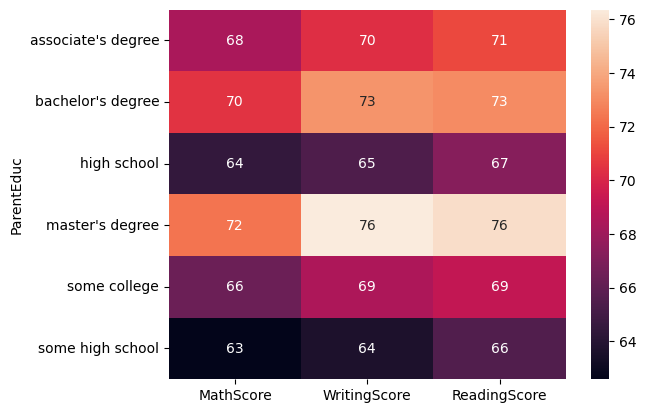

In [11]:
sns.heatmap(gb, annot=True)
plt.show()

# Observation
From the above chart we have concluded that the education of parents have a good impact on students score

In [12]:
gb1 = df.groupby("ParentMaritalStatus").agg({"MathScore":"mean","WritingScore":"mean","ReadingScore":"mean"})
gb1

,MathScore,WritingScore,ReadingScore
ParentMaritalStatus,,,
divorced,66.691197,68.799146,69.655011
married,66.657326,68.420981,69.389575
single,66.165704,68.174440,69.157250
widowed,67.368866,68.563452,69.651438


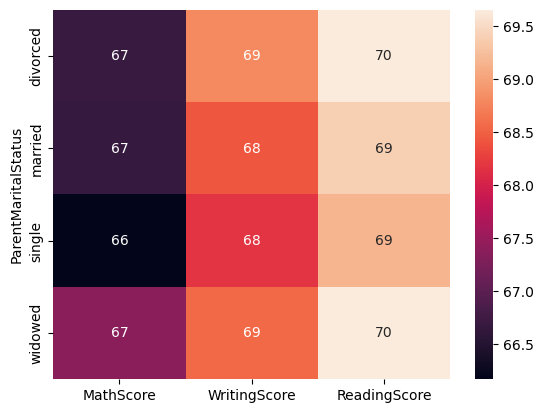

In [13]:
sns.heatmap(gb1, annot=True)
plt.show()

# observation
Parents marital status does not have any impact on students score.

<function matplotlib.pyplot.show(close=None, block=None)>

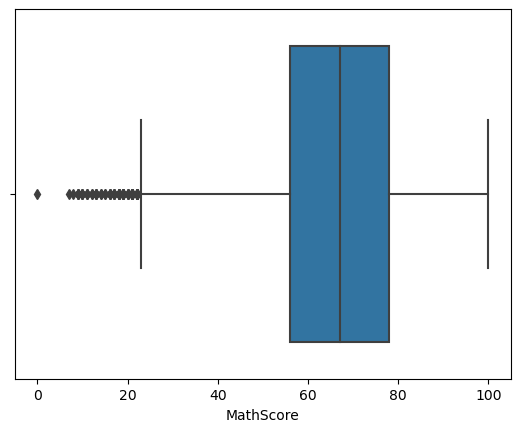

In [14]:
sns.boxplot(data=df, x="MathScore")
plt.show

# Observation
Boxplot show math score has huge outliers

<function matplotlib.pyplot.show(close=None, block=None)>

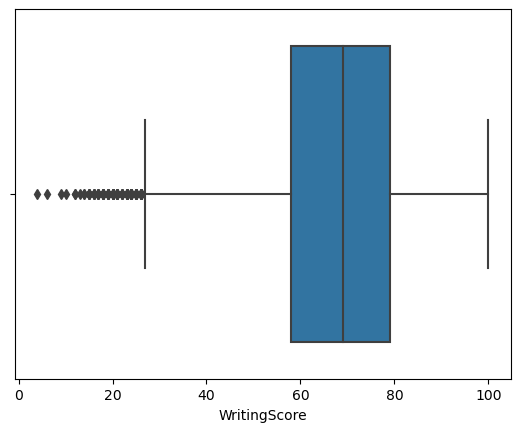

In [15]:
sns.boxplot(data=df, x="WritingScore")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

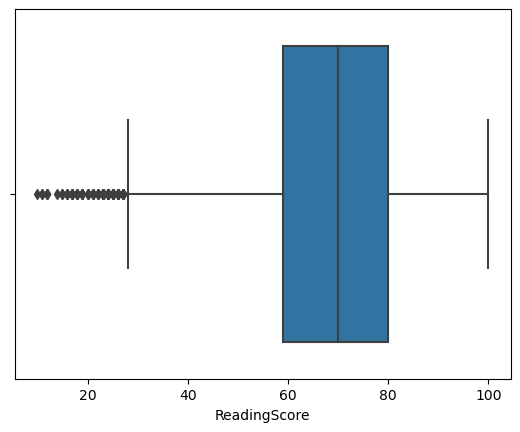

In [16]:
sns.boxplot(data=df, x="ReadingScore")
plt.show

In [17]:
df["EthnicGroup"].unique()

array([nan, 'group C', 'group B', 'group A', 'group D', 'group E'],
      dtype=object)

# Distribution of Ethnic Groups

In [18]:
groupA = df.loc[(df["EthnicGroup"] == "group A")].count()
groupB = df.loc[(df["EthnicGroup"] == "group B")].count()
groupC = df.loc[(df["EthnicGroup"] == "group C")].count()
groupD = df.loc[(df["EthnicGroup"] == "group D")].count()
groupE = df.loc[(df["EthnicGroup"] == "group E")].count()

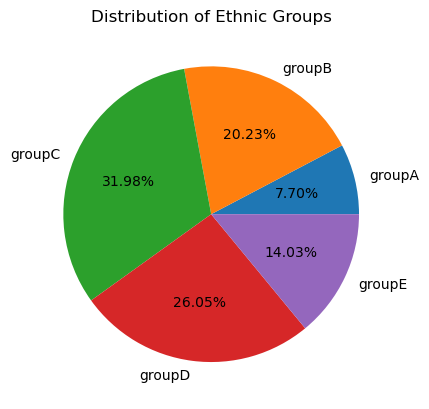

In [19]:
l=["groupA","groupB","groupC","groupD","groupE"]
mlist=[groupA["EthnicGroup"],groupB["EthnicGroup"],groupC["EthnicGroup"],groupD["EthnicGroup"],groupE["EthnicGroup"]]
plt.title("Distribution of Ethnic Groups")
plt.pie(mlist, labels=l,autopct = "%1.2f%%" )
plt.show()

[Text(0, 0, '9212'),
 Text(0, 0, '5826'),
 Text(0, 0, '2219'),
 Text(0, 0, '7503'),
 Text(0, 0, '4041')]

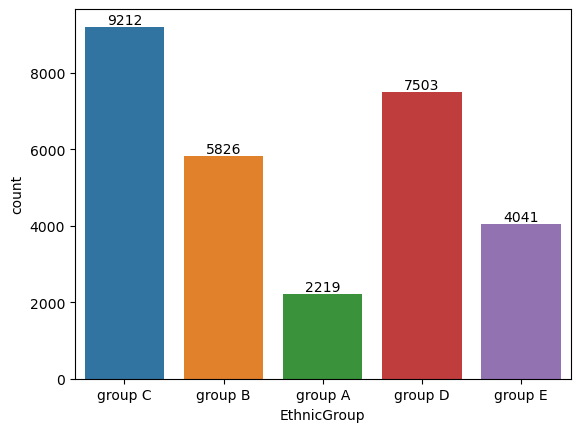

In [20]:
ax = sns.countplot(data = df, x = "EthnicGroup")
ax.bar_label(ax.containers[0])